<a href="https://colab.research.google.com/github/MinervaNunez/Proyecto-de-Python-BEDU/blob/main/bedu_proyecto_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Python Equipo 8

>   *   Nicky García Fierros (nickygarcia@ciencias.unam.mx)
>   *   Kevin Martin Rivera Castro (kevinrc.unam@gmail.com)
>   *   Jesús Manuel Jimenez Cardoza (chucho003@hotmail.com)
>   *   Minerva Estefanía Núñez Manjarrez (estefania.nun.man@gmail.com)
>   *   Luis Mateo Patricio Pineda (mateopa@gmail.com)

---

## Introducción

---

---

## Librerías necesarias

---

In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.util import ngrams

---

## Lectura de Datos

---

Leemos el ```DataFrame``` resultante de nuestro proyecto anterior.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/KevinRC55/Proyecto-de-Python-BEDU/main/RNPEDFC_Final.csv', encoding='ISO-8859-1')

Obtenermos como resultado nuesto ```DataFrame``` principal.

In [4]:
df

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.10,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
1,2007,2007-02-05,02:00:26,4102,Estado De Mexico,Valle De Bravo,Valle De Bravo,"19.16368, -100.134684",Mexicana,Mujer,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.10,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.10,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
4,2008,2008-01-11,12:00:17,3762,Estado De Mexico,Toluca,Toluca,"18.078, -91.6552",Mexicana,Hombre,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35896,2018,2018-04-26,08:00:00,4,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Hombre,22,1.60,Delgada,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla
35897,2018,2018-01-08,11:00:00,112,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Mujer,27,1.70,Robusta,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima
35898,2015,2015-02-02,07:00:00,1183,Puebla,Chila,Chilas De Las Flores,"17.965896, -97.864616",Mexicana,Mujer,86,1.77,Mediana,No Especificado,Ninguno,FGE - Puebla
35899,2017,2017-08-22,04:00:00,251,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Hombre,41,1.76,Robusta,Tatuaje En El Brazo Izquierdo Con La Imagen De...,Ninguno,PGJ - Colima


# TODO

* Utiliza patrones Regex para limpiar tus datos estructurados.
* Dado que debes de conocer bien tu dataset (excepto si es un nuevo dataset que buscaste para este Postwork), es probable que tengas una idea de las palabras que son relevantes para tu tema. Genera un objeto Text con la librería nltk y explora los contextos de las palabras que elegiste. Utiliza el método similar para obtener palabras que tengan contextos similares a las palabras originales. Puede que descubras nuevas palabras que tengan relevancia para tu proyecto.
* Utiliza el objeto FreqDist de nltk para hacer análisis estadístico de tu dataset. Explora las palabras y los bigramas más comunes de tu dataset.
* Realiza visualizaciones de tus conteos de frecuencias utilizando gráficas de barras.
* Realiza visualizaciones de las distribuciones de frecuencias de las longitudes de las palabras o de las oraciones.
* Realiza nubes de palabras para detectar los temas más importantes de tu conjunto de datos.
* Haz un análisis de sentimientos de tu conjunto de datos, de preferencia utilizando una variable categórica para segmentar tus datos y poder comparar las distribuciones de polaridades entre cada segmento.


# Limpiando los No Especificados en senas_particulares

In [5]:
senas_part = df.loc[df['senas_particulares'] !='No Especificado']
senas_part

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.10,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.10,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.10,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
7,2011,2011-06-13,01:00:11,2513,Estado De Mexico,Amecameca,Amecameca,"19.128693, -98.764657",Mexicana,Mujer,7,1.15,Robusta,"Manchas, En El Tobilloderecha Causada Porquema...",Ninguno,FGJ - Estado De Mexico
8,2010,2010-04-24,01:00:47,2928,Estado De Mexico,Teoloyucan,Teoloyucan,"19.751582, -99.171598",Mexicana,Hombre,6,1.15,Delgada,"Cicatrices, En La Caravaricela Pocas",Ninguno,FGJ - Estado De Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35892,2018,2018-04-22,11:30:00,8,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Mujer,18,1.52,Delgada,Perforacion En La Lengua Y Mancha Blanca En Me...,Ninguno,FGE - Puebla
35895,2018,2018-04-15,06:30:00,15,Colima,Colima,Colima,"19.242918, -103.709341",Mexicana,Hombre,57,1.59,Robusta,Tiene Una Cicatriz En La Parte Baja De Su Abdo...,Ninguno,PGJ - Colima
35896,2018,2018-04-26,08:00:00,4,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Hombre,22,1.60,Delgada,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla
35897,2018,2018-01-08,11:00:00,112,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Mujer,27,1.70,Robusta,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima


# Explorando los datos para ver qué podría causar conflicto al hacer el procesamiento del lenguaje natural

In [6]:
senas_part_series = senas_part['senas_particulares']
senas_part_series

0        Tiene Una Cicatriz En La Rodilla Izquierda Por...
2        Manchas, Parte Superior De Pierna Derecha, Cic...
3        Lunares, A La Altura De La Cinturaforma De Man...
7        Manchas, En El Tobilloderecha Causada Porquema...
8                     Cicatrices, En La Caravaricela Pocas
                               ...                        
35892    Perforacion En La Lengua Y Mancha Blanca En Me...
35895    Tiene Una Cicatriz En La Parte Baja De Su Abdo...
35896    Lunar En La Mejilla Y Tatuaje En El Cuello En ...
35897    El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...
35899    Tatuaje En El Brazo Izquierdo Con La Imagen De...
Name: senas_particulares, Length: 17211, dtype: object

¿cuántos tienen lunares?

In [7]:
senas_part_series[senas_part_series.str.contains('Lunar*', case=False)]

3        Lunares, A La Altura De La Cinturaforma De Man...
9        Lunares En Cuello, En Indice Izq Y Arco Del Pi...
13       Cuenta Con Mancha Y/O Lunar En Unos De Los Cod...
28       Lunar En El Menton, Tatuaje Con La Leyenda And...
31       Tiene Un Lunar Atras Del Cuello Y Un Grano En ...
                               ...                        
35873                          Lunar Blanco En El Estomago
35876                  Pequeño Lunar En El Pecho Izquierdo
35890    Lunares En Los Hombros, En El Pecho, En Los Br...
35891    Pecas En El Rostro, Perforacion En La Orja Izq...
35896    Lunar En La Mejilla Y Tatuaje En El Cuello En ...
Name: senas_particulares, Length: 3628, dtype: object

De acuerdo con la anterior instrucción, 3628 registros tienen la palabra "lunar" o "lunares".

In [8]:
senas_part_series[senas_part_series.str.contains('tatuaje*', case=False)]

12       En Unos De Sus Brazos Tiene Un Tatuaje En Unos...
14       Tiene Dos Tatuajes En El Pecho Del Lado Derech...
15       Tatuaje En Forma De Cruz En El Brazo Izquierdo...
18       Tatuaje En Brazo Derecho, Con La Figura De Una...
19       Tatuajes, Uno En Un Brazo, Otro A La Altura De...
                               ...                        
35874    Tiene Un Mechon De Canas En La Parte Frontal D...
35884    Con Un Tatuaje Tipo Gota En El Lagrimal Del Oj...
35888    Tatuaje En El  Antebrazo Izquierdo Por La Part...
35896    Lunar En La Mejilla Y Tatuaje En El Cuello En ...
35899    Tatuaje En El Brazo Izquierdo Con La Imagen De...
Name: senas_particulares, Length: 5434, dtype: object

De acuerdo con la anterior instrucción, 5434 registros tienen tatuajes.

In [9]:
schizo_reg = senas_part_series[senas_part_series.str.contains('esquizofrenia|esquiz', case=False)]
schizo_reg

2317     Carece De Dientes Frontales Superiores, Padece...
2413     Caida Del Parpado Derecho Y Pecas En Mejillas....
2588     Padece Esquizofrenia, Tiene Desviado El Tabiqu...
3576     Sufre De Esquizofrenia, Bigote Negro Y Grueso,...
3896     Padece Esquizofrenia Paranoide, Dentadura Comp...
3978     Padece Esquizofrenia, Dedo Indice De La Mano D...
4390                                         Esquizofrenia
5461     Padece De Sus Facultades Mentales Ya Que Se Le...
11747    Cicatriz De Quemadura Y Cojea De La Pierna Der...
11794    Lunar En  Nariz.  Observaciones; Padece Esquiz...
12456                              Padece De Esquizofrenia
15544    Nariz Aguileña, Desviada A La Derecha,Cicatriz...
15875    Padecia De Esquizofrenia, En Le Ante Brazo Izq...
16277    Tatuaje En El Brazo Izqueirdo De Una "Cara De ...
16565    Cicatriz A La Mitad De La Ceja Derecha    Obse...
17590    Un Lunar Tipo Berruga En La Mejia Del Lado Der...
18619    Tiene Los Dientes Frontales Desgastados  Obser.

In [10]:
schizo_reg.shape

(31,)

De acuerdo con la instrucción anterior, hay 31 personas con esquizofrenia registradas

In [11]:
senas_part_series[senas_part_series.str.contains('tez', case=False)]

1330     2Ura\t1.50\tComplexion\tDelgada\tColor De Tez\...
1347     2Estatura\t1.60\tComplexion\tMedia\tColor De T...
1348     4Atura\t1.60\tComplexion\tRobusta\tColor De Te...
1352     No Especificadoestatura\t1.65\tComplexion\tDel...
1361     Estatura\t0.95\tComplexion\tMedia\tColortez\tM...
                               ...                        
29601    Tez Moreno Clara, De Estatura De 1.70 (Uno Pun...
34026    Complexion Delgada, Estatura De 1.70, Tez Aper...
34253    Tez Blanca, De Complexion Delgada, De Estatura...
35474    Estatura: 1.70 Peso: 60 Kilos, Complexion: Del...
35798    Dos Tatuajes En Su Antebrazo Derecho, Uno Que ...
Name: senas_particulares, Length: 120, dtype: object

En la salida de la instrucción anterior podemos notar que hay entradas con tabulaciones (caracteres '\t'). Limpiando estas entradas:

In [12]:
senas_part_series = senas_part_series.replace(r'\t+|\n+|\r+', ' ', regex=True)
senas_part_series

0        Tiene Una Cicatriz En La Rodilla Izquierda Por...
2        Manchas, Parte Superior De Pierna Derecha, Cic...
3        Lunares, A La Altura De La Cinturaforma De Man...
7        Manchas, En El Tobilloderecha Causada Porquema...
8                     Cicatrices, En La Caravaricela Pocas
                               ...                        
35892    Perforacion En La Lengua Y Mancha Blanca En Me...
35895    Tiene Una Cicatriz En La Parte Baja De Su Abdo...
35896    Lunar En La Mejilla Y Tatuaje En El Cuello En ...
35897    El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...
35899    Tatuaje En El Brazo Izquierdo Con La Imagen De...
Name: senas_particulares, Length: 17211, dtype: object

Verificamos que en efecto se hayan quitado todos los registros con tabulaciones

In [13]:
senas_part_series[senas_part_series.str.contains('\t')]

Series([], Name: senas_particulares, dtype: object)

# Limpieza

In [14]:
# Estandarizando a todo lower case
senas_part_series = senas_part_series.str.lower()

# Quitando los trailing characters
senas_part_series = senas_part_series.str.strip()

# Quitando los \n, \t, \r
senas_part_series = senas_part_series.replace(r'\t', ' ', regex=True)

# Quitando los caracteres que no son letras ni espacios
senas_part_series = senas_part_series.str.replace('[^\w\s]', '', regex=True)

# Quitando comas
sena_part_series = senas_part_series.str.replace(',', '')

# Como los datos ya estan libres de NAs, no es necesario hacer ese procesamnto

#senas_part_series[senas_part_seriess.str.contains(',')]

senas_part_series

0        tiene una cicatriz en la rodilla izquierda por...
2        manchas parte superior de pierna derecha cicat...
3        lunares a la altura de la cinturaforma de manc...
7        manchas en el tobilloderecha causada porquemad...
8                      cicatrices en la caravaricela pocas
                               ...                        
35892    perforacion en la lengua y mancha blanca en me...
35895    tiene una cicatriz en la parte baja de su abdo...
35896    lunar en la mejilla y tatuaje en el cuello en ...
35897    el ojo izquierdo tiene un enfermedad como tic ...
35899    tatuaje en el brazo izquierdo con la imagen de...
Name: senas_particulares, Length: 17211, dtype: object

# Construcción de un objeto Text

In [15]:
# nltk.tokenize.word_tokenize(text, language='english', preserve_line=False)
# WhitespaceTokenizer no hizo diferencia.
# tokens = senas_part_series.apply(WhitespaceTokenizer().tokenize)


tokens = senas_part_series.apply(nltk.word_tokenize, language='spanish')
tokens

0        [tiene, una, cicatriz, en, la, rodilla, izquie...
2        [manchas, parte, superior, de, pierna, derecha...
3        [lunares, a, la, altura, de, la, cinturaforma,...
7        [manchas, en, el, tobilloderecha, causada, por...
8                [cicatrices, en, la, caravaricela, pocas]
                               ...                        
35892    [perforacion, en, la, lengua, y, mancha, blanc...
35895    [tiene, una, cicatriz, en, la, parte, baja, de...
35896    [lunar, en, la, mejilla, y, tatuaje, en, el, c...
35897    [el, ojo, izquierdo, tiene, un, enfermedad, co...
35899    [tatuaje, en, el, brazo, izquierdo, con, la, i...
Name: senas_particulares, Length: 17211, dtype: object

In [16]:
palabras = tokens.sum()
palabras

['tiene',
 'una',
 'cicatriz',
 'en',
 'la',
 'rodilla',
 'izquierda',
 'por',
 'una',
 'caida',
 'tipo',
 'raspon',
 'manchas',
 'parte',
 'superior',
 'de',
 'pierna',
 'derecha',
 'cicatrices',
 'en',
 'ceja',
 'izquierda',
 'y',
 'una',
 'mas',
 'en',
 'el',
 'lado',
 'izquie',
 'lunares',
 'a',
 'la',
 'altura',
 'de',
 'la',
 'cinturaforma',
 'de',
 'mancha',
 'cicatrices',
 'a',
 'un',
 'lado',
 'ojo',
 'derecho',
 'manchas',
 'en',
 'el',
 'tobilloderecha',
 'causada',
 'porquemadura',
 'de',
 'bicileta',
 'quemaduras',
 'cicatrices',
 'en',
 'la',
 'cej',
 'cicatrices',
 'en',
 'la',
 'caravaricela',
 'pocas',
 'lunares',
 'en',
 'cuello',
 'en',
 'indice',
 'izq',
 'y',
 'arco',
 'del',
 'pie',
 'izquierdo',
 'en',
 'la',
 'pierna',
 'izquierda',
 'ya',
 'que',
 'se',
 'le',
 'puso',
 'una',
 'placa',
 'en',
 'el',
 'femur',
 'con',
 'corte',
 'de',
 'volcan',
 'cicatrices',
 'pestañas',
 'rizadas',
 'en',
 'unos',
 'de',
 'sus',
 'brazos',
 'tiene',
 'un',
 'tatuaje',
 'en',

In [17]:
text_obj = nltk.Text(palabras)
text_obj

<Text: tiene una cicatriz en la rodilla izquierda por...>

In [18]:
text_obj.concordance('padece', lines=5)

Displaying 5 of 111 matches:
tiene el lobulo en forma de corazon padece alzheimer presenta una cicatriz en 
recho un arete en la ceja izquierda padece de acido urico dos cicatrices en la
e de color azul con forma de letras padece lagunas mentales le faltan algunos 
ece de dientes frontales superiores padece esquizofrenia cicatriz en el pie iz
de dentadura completa observaciones padece secuelas de infarto cerebral es man


In [19]:
text_obj.concordance('droga', lines=20)

Displaying 8 of 8 matches:
dos los dientes por el consumo de la droga demasiado delgado a consecuencia del
ca con el nmbre de michelle consumia droga marihuana ingeria vevidas alcocholic
ho deformacion de nariz por adicto a droga bigote cicatriz de dos centimetros e
 y tiene deshechas las muelas por la droga tiene lunar como berruga en la espal
ntes penales si toma no fuma y no se droga es de complexion delgado de peso apr
do izquierdo cicatricez de aguja por droga en los dos brazos quijada un poco sa
nariamente no utiliza ningun tipo de droga no tiene tatuajes inclinacion de su 
n el rostro ni alguna cicatriz no se droga y tiene tatuajes en unos de sus homb


In [20]:
text_obj.concordance("drogas")

Displaying 14 of 14 matches:
lgado a consecuencia del consumo de drogas tiene tatuadas las cejas y los labi
interior de quemada es adicto a las drogas la que se le conoce como piedra tie
en su brazo derecho es adicto a las drogas un lunar en el cuello del lado dere
se de la nariz presenta adiccion en drogas y alcohol tiene dos tatuajes uno a 
dad tanto fisica como mental no usa drogas no toma bebidas embriagantes si tie
dad tanto fisica como mental no usa drogas no toma bebidas embriagantes no fum
n el estomago su apellido lujan usa drogas y licor un tatuaje de forma del cal
 internado por su enfermedad de las drogas el no usa tatuajes cuenta con tatua
cha padece de esquizofrenia consume drogas y alcohol como caracteristica tiene
ene buen estado de salud no consume drogas como sus señas particulares tiene u
 en el brazo izquierdo adicto a las drogas con tatuajes en cuello el nombre de
 de salud ya que no fuma no consume drogas y toma ocasionalmente y como seña p
o es adicto a ningun me

In [21]:
text_obj.concordance('marihuana')

Displaying 25 of 57 matches:
 tatuajes antebrazos una hierba de marihuana con una calavera uno en sus hombro
en forma de calavera y una hoja de marihuana tatuaje en el lado derecho de una 
ip hp y en pantorrilla una hoja de marihuana como seña particular en la nuca ti
r la virgen una cruz y una hoja de marihuana cicatris en forma de circulño en e
uaje en el pie derecho en forma de marihuana tipo estrella de mar y en el brazo
zquierdo una imagen de una hoja de marihuana como con tres picos color verde a 
que sufrio y quien consumia fumaba marihuana en ocasiones cicatriz debajo de oj
un tatuaje en forma de una hoja de marihuana poco bigote barba de chivo tatuaje
a santisima muerte con una hoja de marihuana en el estomago una cara prehispani
laseñor en cada hombro una hoja de marihuana en el brazo sin especificar lado t
es 1 en brazo izquierdo la hoja de marihuana antebrazo izquierdo la figura de l
mbro derart pulgar e indicehoja de marihuana y abajo samuelderecha letra s cica
uello poste

In [22]:
text_obj.similar('muerte')

pierna cabeza cara rodilla mano espalda muñeca ceja frente nariz
cicatriz nuca leyenda lengua cruz virgen oreja letra pantorrilla boca


In [23]:
text_obj.similar('padece')

cicatriz tatuaje arriba es cerca debajo cicatrices y nombre tiene
figura ausencia mancha lunar como carece parte tatuajes forma uno


In [24]:
text_obj.similar("tatuaje")

cicatriz y lunar tatuajes cicatrices otro lunares uno perforacion
tiene cuenta una de en manchas mancha izquierdo derecho grande como


In [25]:
text_obj.similar('tatuajes')

tatuaje cicatriz y cicatrices lunar lunares tiene en otro una uno
perforaciones perforacion de manchas mancha dientes bigote pecas barba


In [26]:
text_obj.similar('adicto')

que debido adicta cicatriz y un tatuaje lunar tatuajes flores cual
operacion medio quemadura renguea junto letra casi negro cojea


In [27]:
text_obj.similar("adicta")

adicto un debido notable decir tendiente


In [28]:
text_obj.concordance('en')

Displaying 25 of 29325 matches:
tiene una cicatriz en la rodilla izquierda por una caida ti
superior de pierna derecha cicatrices en ceja izquierda y una mas en el lado i
icatrices en ceja izquierda y una mas en el lado izquie lunares a la altura de
atrices a un lado ojo derecho manchas en el tobilloderecha causada porquemadur
ura de bicileta quemaduras cicatrices en la cej cicatrices en la caravaricela 
duras cicatrices en la cej cicatrices en la caravaricela pocas lunares en cuel
ices en la caravaricela pocas lunares en cuello en indice izq y arco del pie i
 caravaricela pocas lunares en cuello en indice izq y arco del pie izquierdo e
n indice izq y arco del pie izquierdo en la pierna izquierda ya que se le puso
izquierda ya que se le puso una placa en el femur con corte de volcan cicatric
de volcan cicatrices pestañas rizadas en unos de sus brazos tiene un tatuaje e
n unos de sus brazos tiene un tatuaje en unos de sus brazos las cuales son una
n jonathan cuenta con mancha yo lunar e

In [29]:
text_obj.similar('santa')

y ceja tatuaje mano cicatriz barba cabeza virgen nariz apendice s una
cruz figura piel leyenda cara muñeca frente perforacion


In [30]:
text_obj.concordance('santa')

Displaying 25 of 384 matches:
 brazos la imagen de una sirena y la santa muerte en la espalda dos imagenes de
rte en la espalda dos imagenes de la santa muerte imagen grande la santa muerte
 de la santa muerte imagen grande la santa muerte en la espalda del lado derech
n la paleta del lado izquierdo de la santa muerte lunar en el labio inferior de
uaje en la pierna izquierda y es una santa muerte con los nombres itzel y jorge
 a la altura del hombro imagen de la santa muerte lunar tatuado en la barbilla 
marg una palabra la niña imagen dela santa muerte palabra javier 7 pierna izqui
es en el pie derecho la figura de la santa muerte y en la espalda una chola con
rzo lado derecho con la figura de la santa muerte en el pecho tiene tatuados lo
es en el labio superior tatuaje de a santa muerte en la espalda tatuaje en pant
cicatriz en la mano un tatuaje de la santa muerte en la espalda tiene una perfo
tura del chamorro de la figura de la santa muerte lunar redondo grande en uno d
n corazon 

In [31]:
# Riqueza lexica

len(set(text_obj))/len(text_obj)

0.03447921883603085

In [52]:
text_obj.common_contexts(['santa', 'tatuaje'])

izquierdo_muerte la_en letra_en de_en una_en pecho_en


La riqueza léxica es muy pobre en las descripciones.

In [32]:
text_obj.collocations()

una cicatriz; del lado; lado derecho; lado izquierdo; cuenta con;
brazo derecho; brazo izquierdo; mano derecha; tiene una; santa muerte;
pierna derecha; mano izquierda; seña particular; color negro; que
dice; asi como; color cafe; ceja izquierda; parte superior; ceja
derecha


# Utilizando freqDist

In [33]:
freq_dist = nltk.FreqDist(palabras)

In [34]:
print(freq_dist)
freq_dist

<FreqDist with 11084 samples and 321469 outcomes>


FreqDist({'en': 29325, 'de': 21598, 'la': 18617, 'el': 12523, 'y': 8433, 'una': 8327, 'cicatriz': 7859, 'un': 7854, 'tiene': 6236, 'con': 6177, ...})

In [35]:
freq_dist.most_common(40)

[('en', 29325),
 ('de', 21598),
 ('la', 18617),
 ('el', 12523),
 ('y', 8433),
 ('una', 8327),
 ('cicatriz', 7859),
 ('un', 7854),
 ('tiene', 6236),
 ('con', 6177),
 ('derecho', 5968),
 ('tatuaje', 5750),
 ('izquierdo', 5355),
 ('del', 5184),
 ('lado', 4311),
 ('brazo', 3837),
 ('lunar', 3173),
 ('derecha', 2945),
 ('izquierda', 2483),
 ('espalda', 2320),
 ('que', 2226),
 ('a', 2101),
 ('forma', 1998),
 ('su', 1855),
 ('parte', 1793),
 ('nombre', 1737),
 ('mano', 1737),
 ('los', 1718),
 ('por', 1651),
 ('pecho', 1642),
 ('tatuajes', 1626),
 ('color', 1491),
 ('leyenda', 1460),
 ('dos', 1404),
 ('pierna', 1376),
 ('cicatrices', 1332),
 ('no', 1296),
 ('ceja', 1283),
 ('las', 1226),
 ('como', 1170)]

In [36]:
esp_stopw = stopwords.words('spanish')
esp_stopw

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [37]:
palabras_no_stopw = [token for token in palabras if token not in esp_stopw]
len(palabras_no_stopw)

171918

In [38]:
# Quitando las stopwords queda el 50%:

s = f'{100*(len(palabras_no_stopw) / len(palabras)):.3f}%'

print(f'Tras quitar las stopwords queda el {s} de palabras.')

Tras quitar las stopwords queda el 53.479% de palabras.


In [39]:
freq_dist_palabras_no_stopw = nltk.FreqDist(palabras_no_stopw)
print(freq_dist_palabras_no_stopw)

<FreqDist with 10953 samples and 171918 outcomes>


In [40]:
freq_dist_palabras_no_stopw.most_common(40)

[('cicatriz', 7859),
 ('derecho', 5968),
 ('tatuaje', 5750),
 ('izquierdo', 5355),
 ('lado', 4311),
 ('brazo', 3837),
 ('lunar', 3173),
 ('derecha', 2945),
 ('izquierda', 2483),
 ('espalda', 2320),
 ('forma', 1998),
 ('parte', 1793),
 ('nombre', 1737),
 ('mano', 1737),
 ('pecho', 1642),
 ('tatuajes', 1626),
 ('color', 1491),
 ('leyenda', 1460),
 ('dos', 1404),
 ('pierna', 1376),
 ('cicatrices', 1332),
 ('ceja', 1283),
 ('hombro', 1170),
 ('centimetros', 1157),
 ('cuenta', 1119),
 ('aproximadamente', 1088),
 ('frente', 1041),
 ('cara', 1016),
 ('superior', 949),
 ('altura', 944),
 ('figura', 932),
 ('cuello', 921),
 ('antebrazo', 883),
 ('imagen', 878),
 ('presenta', 841),
 ('nariz', 789),
 ('abdomen', 768),
 ('labio', 766),
 ('cabeza', 742),
 ('mejilla', 735)]

In [41]:
num_tatuaje = 100*freq_dist_palabras_no_stopw['tatuaje']
tot = len(palabras_no_stopw)

print(f'Porcentaje de aparicion de tatuaje:{(num_tatuaje / tot):.2f}%')

Porcentaje de aparicion de tatuaje:3.34%


Proporcion de palabras ocupadas por las 50 palabras más comunes

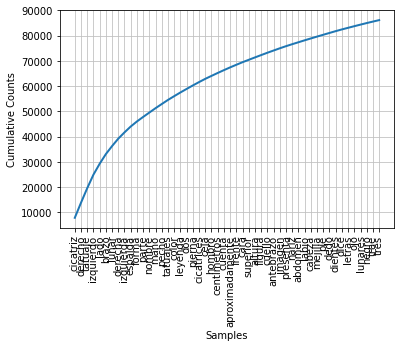

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [42]:
freq_dist_palabras_no_stopw.plot(50, cumulative=True)

El 90,000 de las palabras en `palabras_no_stopw` son las 50 palabras más frecuentes. Esta observación es confirmada por el bajo porcentaje en riqueza lexica.

Palaras que sólo ocurren una vez

In [43]:
print(len(freq_dist_palabras_no_stopw.hapaxes()))
freq_dist_palabras_no_stopw.hapaxes()[:50]

6664


['cinturaforma',
 'tobilloderecha',
 'porquemadura',
 'bicileta',
 'caravaricela',
 'rizadas',
 'sentaderas',
 'rabadulla',
 'andrid',
 'naciente',
 'seja',
 'partede',
 'mantenedor',
 'coyunturas',
 'especificadoa',
 'forna',
 'elva',
 'pzas',
 'mati',
 'ctabique',
 'kgtatuaje',
 'tarahumara',
 'mestiza',
 'acomodado',
 'derechodientes',
 'sagre',
 'elyalma',
 'ubarba',
 'duna',
 'iej',
 'bigoteojos',
 'lono',
 'zafiro',
 'cabrera',
 'quemaron',
 'edmundo',
 'macadentadura',
 'mestizopantalon',
 'cruzado',
 'lunano',
 'pst',
 'vala',
 'redondocicatriz',
 'nedro',
 'palaomas',
 'facturo',
 'ladeandose',
 'pequenas',
 'heridad',
 'lao']

Como se aprecia de la línea anterior, las palabras que solo ocurren una vez son producto de faltas de ortografía.

In [44]:
unicas = set(palabras_no_stopw)
unicas = pd.Series(list(unicas))

unicas

0               amputados
1              lagrimitas
2                presisar
3            arregladocon
4        aproxiamadamente
               ...       
10948               curas
10949           tendiente
10950               melon
10951             vacunas
10952                 ahe
Length: 10953, dtype: object

In [45]:
unicas[unicas.str.len()>15]

4              aproxiamadamente
51             orandopantorrila
77         izquierdaperforacion
110           tataujesantebrazo
126            superiorpearsing
                  ...          
10838         derechahorizontal
10842     prununciadacicatrices
10863    izquierdoobservaciones
10896          derechocrucifijo
10942         centimetrosdebajo
Length: 189, dtype: object

De la anterior instrucción podemos observar que algunas de las palabras largas resultan de errores en los registros.

In [46]:
freq_dist_long = nltk.FreqDist(
[len(s) for s in palabras_no_stopw])

In [47]:
freq_dist_long.most_common()

[(7, 35910),
 (5, 31513),
 (6, 29149),
 (8, 21057),
 (4, 20239),
 (9, 14477),
 (3, 5893),
 (10, 4584),
 (11, 2786),
 (1, 1710),
 (2, 1555),
 (15, 1265),
 (12, 765),
 (13, 570),
 (14, 242),
 (16, 82),
 (17, 41),
 (18, 27),
 (19, 14),
 (20, 13),
 (21, 13),
 (22, 5),
 (23, 2),
 (43, 1),
 (27, 1),
 (47, 1),
 (76, 1),
 (26, 1),
 (25, 1)]

In [48]:
unicas[unicas.str.len() == 76]

8675    narizmedianatipoafiladacomplexiondelgadatipora...
dtype: object

In [49]:
for itm in [43, 27, 47, 76, 26, 25]:
    print(unicas[unicas.str.len() == itm])

1091    brazobrazopantorrillapantorrilapechopantera
dtype: object
5153    antebrazospantorrillavarias
dtype: object
10749    brazostoraxpiernaserpienteletraspiramidedemonio
dtype: object
8675    narizmedianatipoafiladacomplexiondelgadatipora...
dtype: object
6057    aproximadamentetatuajesuno
dtype: object
5124    siguientescaracteristicas
dtype: object


In [50]:
freq_dist_long.freq(7)

0.20887865145010995

# Visualizando

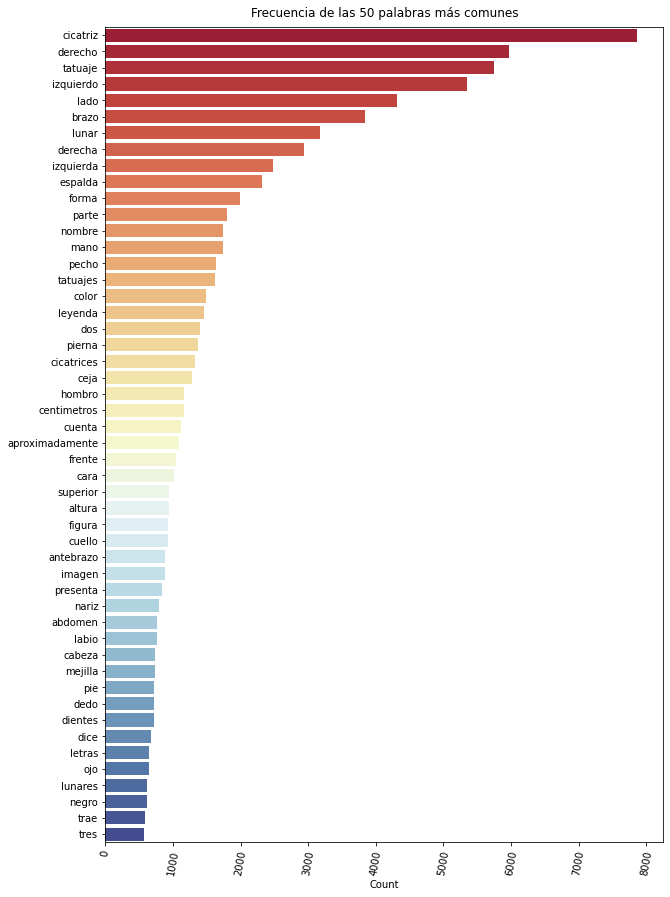

In [62]:
# Frecuencia de las palabras más comunes.

comunes_50 = np.array(
    list(
        map(
            lambda x: list(x), freq_dist_palabras_no_stopw.most_common(50)
            )
        )
)

fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot()

sns.barplot(y=comunes_50[:, 0], x=comunes_50[:, 1].astype('int'), ax=ax, palette='RdYlBu')
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count')
ax.tick_params(axis='x', rotation=80)

In [64]:
# freq_dist_palabras_no_stopw.most_common(50)

# bigramas más comunes y su frecuencia

freq_dist_bigramas = nltk.FreqDist(list(nltk.bigrams(text_obj)))
freq_dist_bigramas

FreqDist({('en', 'la'): 9034, ('en', 'el'): 8789, ('cicatriz', 'en'): 4747, ('de', 'la'): 3855, ('tatuaje', 'en'): 3652, ('una', 'cicatriz'): 2853, ('el', 'brazo'): 2150, ('con', 'la'): 2053, ('un', 'tatuaje'): 2004, ('del', 'lado'): 1971, ...})

In [67]:
# bigramas sin las stopw y su frecuencia.

freq_dist_bigramas = nltk.FreqDist(
    list(
        nltk.bigrams(
            nltk.Text(palabras_no_stopw)
        )
    )
)

freq_dist_bigramas

FreqDist({('lado', 'derecho'): 1918, ('lado', 'izquierdo'): 1718, ('brazo', 'derecho'): 1619, ('brazo', 'izquierdo'): 1510, ('tatuaje', 'brazo'): 865, ('mano', 'derecha'): 747, ('pierna', 'derecha'): 658, ('mano', 'izquierda'): 657, ('derecho', 'cicatriz'): 588, ('izquierdo', 'cicatriz'): 512, ...})

/tmp/ipykernel_11712/2905568215.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  comunes_50 = np.array(


Text(0.5, 0, 'Count')

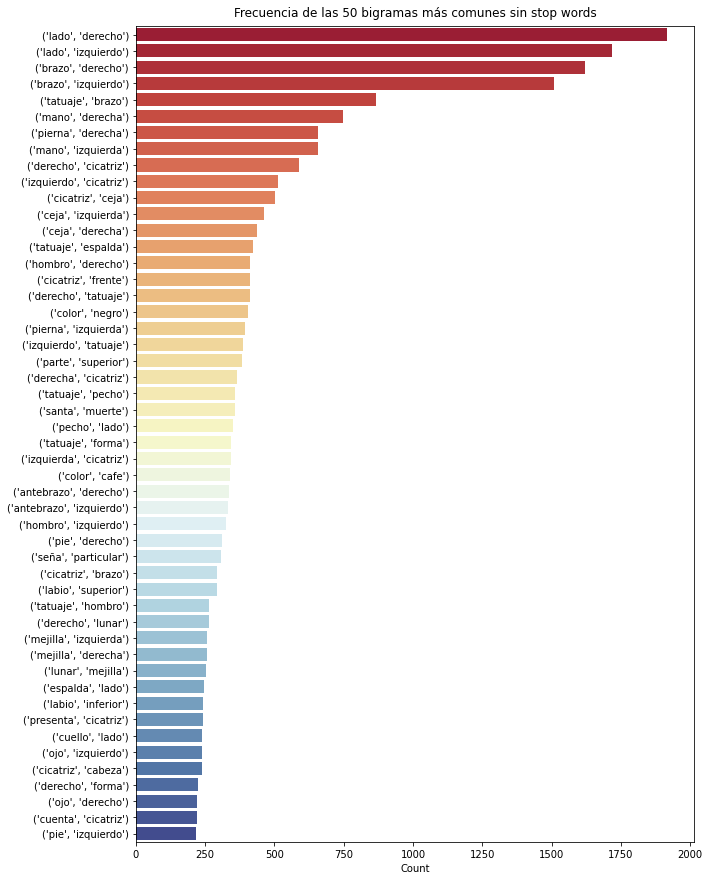

In [72]:
# Graficamos los bigramas y su frecuencia.

comunes_50 = np.array(
    list(
        map(
            lambda x: list(x), freq_dist_bigramas.most_common(50)
            )
        )
)

fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot()

sns.barplot(y=comunes_50[:, 0], x=comunes_50[:, 1].astype('int'), ax=ax, palette='RdYlBu')
ax.set_title('Frecuencia de las 50 bigramas más comunes sin stop words', pad=10)
ax.set_xlabel('Count')
#ax.tick_params(axis='x', rotation=75)

In [77]:
# trigramas sin las stopw y su frecuencia.

freq_dist_trigramas = nltk.FreqDist(
    list(
        ngrams(
            nltk.Text(palabras_no_stopw), 3
        )
    )
)

freq_dist_trigramas

FreqDist({('tatuaje', 'brazo', 'derecho'): 422, ('tatuaje', 'brazo', 'izquierdo'): 339, ('lado', 'derecho', 'cicatriz'): 249, ('cicatriz', 'ceja', 'izquierda'): 207, ('pecho', 'lado', 'izquierdo'): 206, ('lado', 'izquierdo', 'cicatriz'): 191, ('cicatriz', 'ceja', 'derecha'): 188, ('tatuaje', 'hombro', 'derecho'): 131, ('lado', 'derecho', 'tatuaje'): 128, ('cicatriz', 'brazo', 'izquierdo'): 126, ...})

/tmp/ipykernel_11712/2468443567.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  comunes_50 = np.array(


Text(0.5, 0, 'Count')

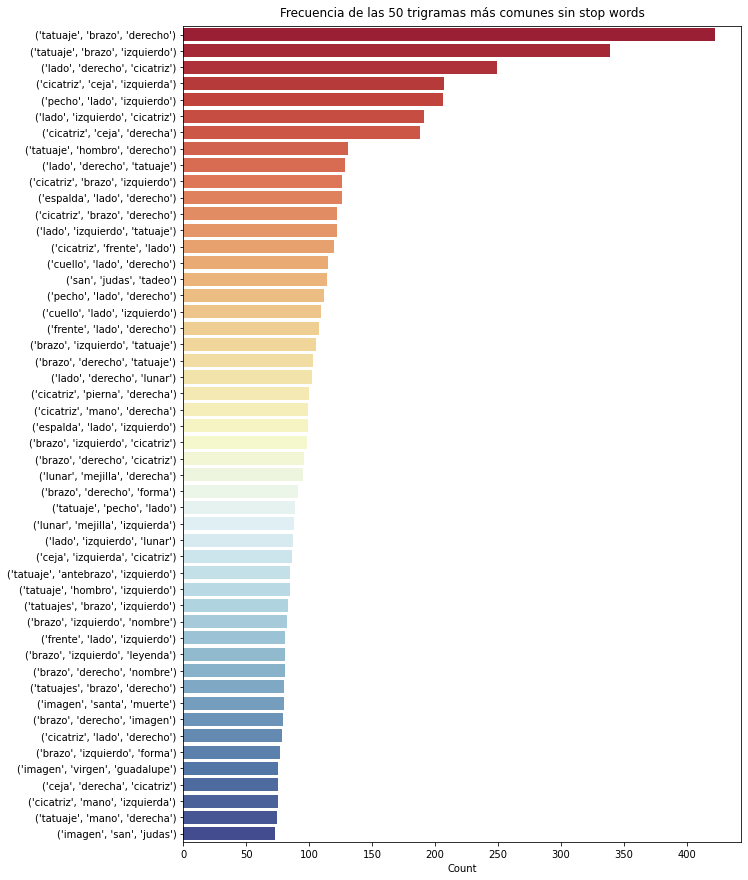

In [79]:
# Graficamos los trigramas y su frecuencia.

comunes_50 = np.array(
    list(
        map(
            lambda x: list(x), freq_dist_trigramas.most_common(50)
            )
        )
)

fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot()

sns.barplot(y=comunes_50[:, 0], x=comunes_50[:, 1].astype('int'), ax=ax, palette='RdYlBu')
ax.set_title('Frecuencia de las 50 trigramas más comunes sin stop words', pad=10)
ax.set_xlabel('Count')
#ax.tick_params(axis='x', rotation=75)

<AxesSubplot: ylabel='Count'>

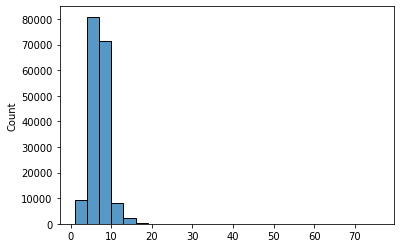

In [88]:
# histograma de la frecuencia de longitudes de palabras y oraciones
# Los outliers no permiten estudiar bien el comportamiento de la distribución

sns.histplot(data=[len(s) for s in palabras_no_stopw], binwidth=3)

<AxesSubplot: ylabel='Count'>

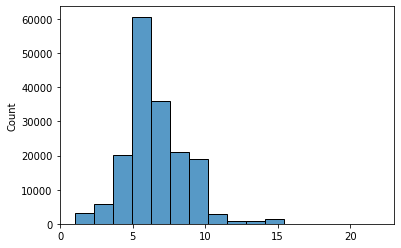

In [101]:
# Quitamos las palabras con más de 23 letas
# De acuerdo con la RAE, la palabra más larga en español tiene 23 letas.

palabras_no_outliers = [w for w in palabras_no_stopw if len(w) < 23]

# graficando el histograma:

sns.histplot(data=[len(s) for s in palabras_no_outliers], bins=16)

# La distribución es aproximadamente normal salvo outliers.

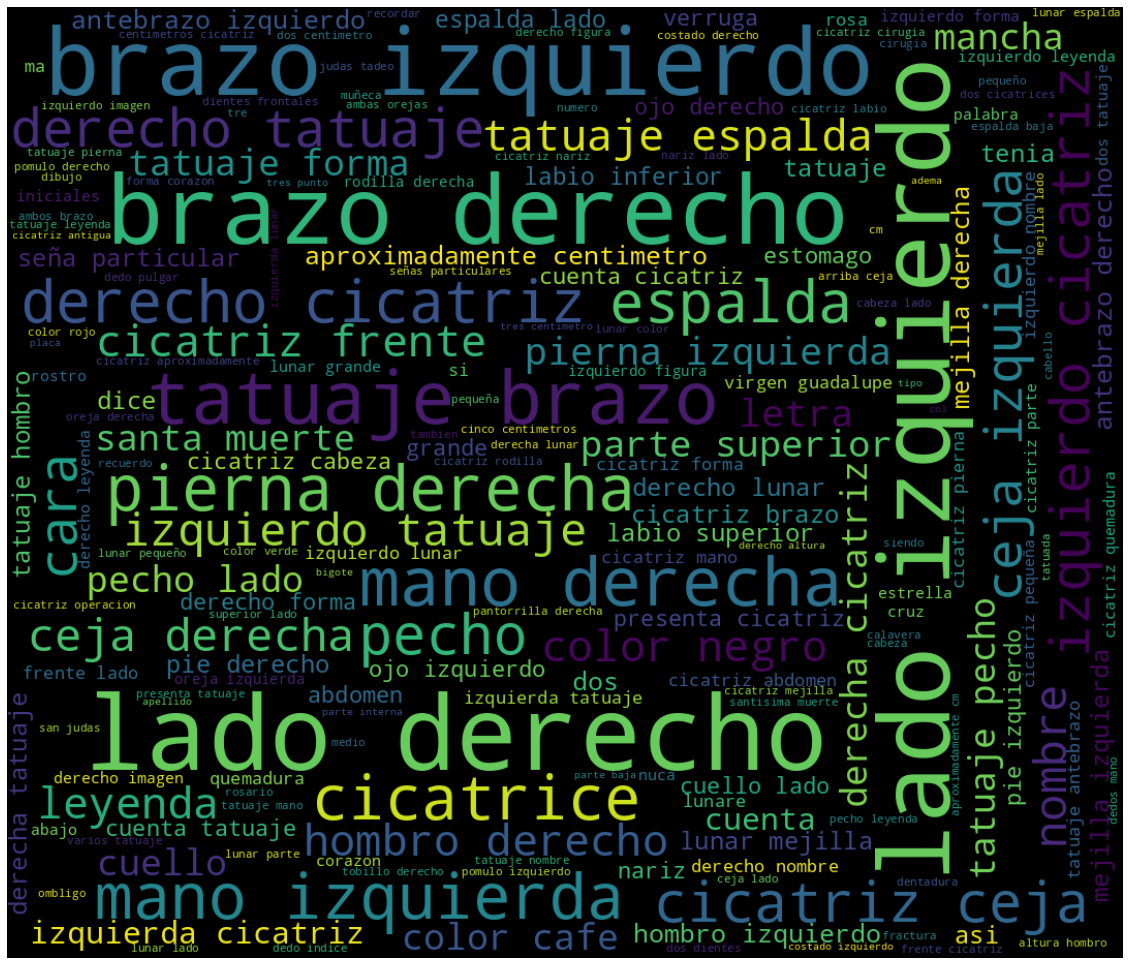

In [105]:
# nube de palabras

nube = WordCloud(width=1080, height=920, max_font_size=100, background_color='black').generate(' '.join(palabras_no_outliers))

plt.figure(figsize=(20,20))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()